### State decomposition analysis 

For comparing states between two ODE models

In [3]:
%load_ext autoreload
%autoreload 2

In [5]:
import analyzeODE as ao

#### Downsampling
Run this (by setting if statement to 1) if the pickle files have not been downsampled

In [6]:
import Case 
cases = dict()

## Baseline

In [7]:
import downSamplePickles
root = "/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
files = ["mouse_freq1p0_60.pickle"]
reducedFiles = [ x.replace(".pickle","_red.pickle") for x in files]

if 0:
    for i,file in enumerate(files):
        fileName = root+file
        print fileName
        downSamplePickles.downsample(fileName,10)

print reducedFiles

['mouse_freq1p0_60_red.pickle']


In [2]:
import Case 
cases = dict()

In [8]:
cases['baseline'] = Case.Case(tag="Baseline",label="Baseline")
cases['baseline'].name = root+reducedFiles[0]

In [102]:
ao.LoadPickles(cases,noOverwrite=True)

#  baseline
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle
Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle


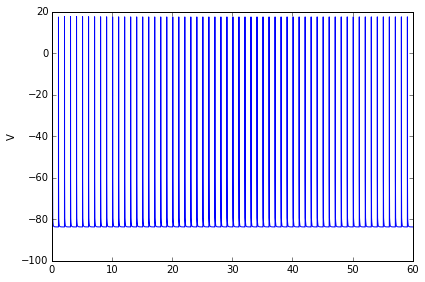

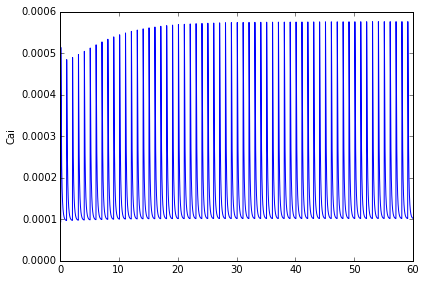

In [9]:
def myplot(case,label1,xlim=[0,-1]):
    plt.figure()
    ti = case.data['t']
    si = case.data['s']
    s_idx = case.data['s_idx']
    #print np.shape(s_idx)
    idx1 = s_idx.index(label1)
    ti_vals = ti[xlim[0]:xlim[1]]
    si_vals = si[xlim[0]:xlim[1],idx1]
    plt.plot(ti_vals/1e3,si_vals,label = case.label)
    plt.ylabel(label1)

trialCase = cases['baseline']    
myplot(trialCase,"V")#,xlim=[55e3,60e3])    
plt.tight_layout()
plt.gcf().savefig(root+"baseline_minute_V.png")        
myplot(trialCase,"Cai")#,xlim=[55e3,60e3])    

data = trialCase.data
for state in data['s_idx']:
   # myplot(trialCase,state,xlim=[29e3,30e3])    
    1

    plt.tight_layout()
#    plt.gcf().savefig(root+"baseline_minute_%s.png")%state    

## NCX  NOTE: the downsampling routine only needs to be run once (after which point the downsampled pickles are saved)

In [10]:
import downSamplePickles
root = "/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
files = ["mouse_ncx1p25x_freq1p0_60.pickle","mouse_freq1p0_60.pickle"]
reducedFiles = [ x.replace(".pickle","_red.pickle") for x in files]

if 0:
    for i,file in enumerate(files):
        fileName = root+file
        print fileName
        downSamplePickles.downsample(fileName,10)

print reducedFiles

['mouse_ncx1p25x_freq1p0_60_red.pickle', 'mouse_freq1p0_60_red.pickle']


#### Define and load cases

In [11]:
import Case 
cases = dict()

In [12]:
cases['baseline'] = Case.Case(tag="Baseline",label="Baseline")
cases['baseline'].name = root+reducedFiles[1]
cases['ncx'] = Case.Case(tag="NCX",label="NCX")
cases['ncx'].name = root+reducedFiles[0]

In [13]:
ao.LoadPickles(cases,noOverwrite=True)

#  ncx
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_ncx1p25x_freq1p0_60_red.pickle
Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_ncx1p25x_freq1p0_60_red.pickle
#  baseline
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle
Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle


#### Perform state decomposition analysis

Compares means between states of two simulations and ranks states by their pct change. 

- indSS: defines range over which comparative analysis is performed [ms] 
- xlim: defines plotting range
- ranked: return top N states

Selecting  baseline
Selecting  ncx
#  NCX
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_ncx1p25x_freq1p0_60_red.pickle
Skipping read, since already populated
#  Baseline
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle
Skipping read, since already populated
/home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_ncx1p25x_freq1p0_60_red.pickle
/home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle
I pct -0.36 0 2.0e-03/1.0e+00 1 1.3e-03/6.4e-01
O pct -0.21 0 1.3e-04/1.0e+00 1 1.0e-04/7.9e-01
Ca_SL pct -0.16 0 5.3e-04/1.0e+00 1 4.5e-04/8.4e-01
Ca_jct1 pct -0.16 0 2.2e-03/1.0e+00 1 1.9e-03/8.4e-01
Cai pct -0.14 0 1.7e-04/1.0e+00 1 1.4e-04/8.6e-01
fCaB_SL pct -0.14 0 6.5e-02/1.0e+00 1 5.6e-02/8.6e-01
Ca_Calmodulin pct -0.13 0 5.5e-04/1.0e+00 1 4.8e-04/8.7e-01
Ca_SLB_SL pct -0.13 0 4.2e-02/1.0e+00 1 3.6e-02/8.7e-01
Ca_Myosin pct -0.11 0 2.4e-03/1.0e+00 1 2.1e-03/8.9e-01
Ca_SLB_jct1 pct -0.11 0 4.1e-02/1.0e+00 1 3.6e-02/8.9e

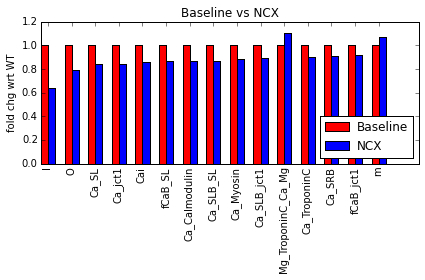

In [14]:
indSS = [5e3,15e3]
xlim = indSS
ao.StateDecompositionAnalysis(cases,wanted1="baseline",wanted2="ncx",indSS=indSS,xlim=xlim,ranked=15)

In [15]:
ignoreList = cases['ncx'].data['j_idx']
ignoreList = [s for s in ignoreList if "i_" not in s and "j_" not in s]
print ignoreList

['Vol_Cell', 'Vol_SR', 'Vol_SL', 'Vol_jct1', 'Vol_myo', 'E_Na_jct1', 'E_Na_SL', 'E_Ca_jct1', 'E_Ca_SL', 'E_K', 'E_Cl', 'openProb', 'alpha_h', 'beta_h', 'alpha_j', 'beta_j', 'alpha_m', 'beta_m', 'sigma', 'f_NaK', 'Xr_infinity', 'tau_Xr', 'Rr', 'pCa_jct1', 'pCa_SL', 'G_Ks_jct1', 'G_Ks_SL', 'E_Ks', 'Xs_infinity', 'tau_Xs', 'X_Kur_slowss', 'tau_Xkur', 'Y_Kur_slowss', 'tau_Ykur1', 'tau_Ykur2', 'a_Kur', 'fIKuravail', 'xssss', 'tauxss', 'X_tos_infinity', 'tau_X_tos', 'Y_tos_infinity', 'tau_Y_tos', 'R_tos_infinity', 'tau_R_tos', 'X_tof_infinity', 'tau_X_tof', 'Y_tof_infinity', 'tau_Y_tof', 'alpha_K1', 'beta_K1', 'K1_infinity', 'd_infinity', 'tau_d', 'f_infinity', 'tau_f', 'fCa_SL', 'fCa_jct1', 'temp_jct1', 'temp_SL', 'Q_NCX', 'Ka_SL', 'Ka_jct1', 'Q_SLCaP', 'kCaSR', 'koSRCa', 'kiSRCa', 'RI', 'Q_SRCaP', 'J_Na_jct1_SL', 'J_Na_SL_myo', 'J_Ca_jct1_SL', 'J_Ca_SL_myo', 'dCa_TroponinC', 'dCa_TroponinC_Ca_Mg', 'dMg_TroponinC_Ca_Mg', 'dCa_Calmodulin', 'dCa_Myosin', 'dMg_Myosin', 'dCa_SRB', 'dCa_cytosol_

Selecting  baseline
Selecting  ncx
#  NCX
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_ncx1p25x_freq1p0_60_red.pickle
Skipping read, since already populated
#  Baseline
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle
Skipping read, since already populated
/home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_ncx1p25x_freq1p0_60_red.pickle
/home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle
Skipping  dNa_SL_buf
Skipping  dNa_jct1_buf
Skipping  dCa_SL_tot_bound
Skipping  dCa_SLHigh_SL
Skipping  dCalsequestrin
Skipping  dCa_TroponinC
Skipping  dCa_SRB
Skipping  dCa_Myosin
Skipping  dMg_Myosin
Skipping  dCa_SLB_SL
Skipping  dCa_cytosol_tot_bound
i_Cl_Ca pct -0.29 0 -5.5e-03/1.0e+00 1 -3.9e-03/7.1e-01
Skipping  dMg_TroponinC_Ca_Mg
Skipping  dCa_TroponinC_Ca_Mg
i_Ca_SL_tot pct 0.18 0 4.3e-02/1.0e+00 1 5.1e-02/1.2e+00
j_rel_SR pct -0.18 0 1.1e-03/1.0e+00 1 8.8e-04/8.2e-01
Skipping  temp_jct1
j_pump_SR pct -0.17 0 1.2e-

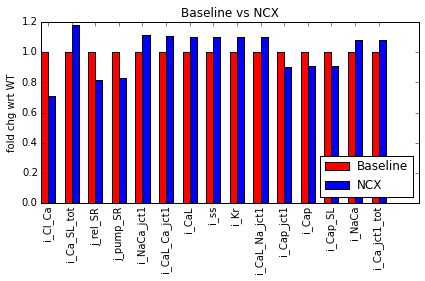

In [16]:
ao.StateDecompositionAnalysis(cases,wanted1="baseline",wanted2="ncx",indSS=indSS,xlim=xlim,ranked=15,mode="fluxes",ignoreList=ignoreList)

## LCC

In [17]:
import downSamplePickles
root = "/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
files = ["mouse_lcc1p25x_freq1p0_60.pickle","mouse_freq1p0_60.pickle"]
reducedFiles = [ x.replace(".pickle","_red.pickle") for x in files]

if 0:
    for i,file in enumerate(files):
        fileName = root+file
        print fileName
        downSamplePickles.downsample(fileName,10)

print reducedFiles

['mouse_lcc1p25x_freq1p0_60_red.pickle', 'mouse_freq1p0_60_red.pickle']


In [18]:
import Case 
cases = dict()

In [19]:
cases['baseline'] = Case.Case(tag="Baseline",label="Baseline")
cases['baseline'].name = root+reducedFiles[1]
cases['lcc'] = Case.Case(tag="LCC",label="LCC")
cases['lcc'].name = root+reducedFiles[0]

In [20]:
ao.LoadPickles(cases,noOverwrite=True)

#  baseline
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle
Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle
#  lcc
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_lcc1p25x_freq1p0_60_red.pickle
Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_lcc1p25x_freq1p0_60_red.pickle


Selecting  baseline
Selecting  lcc
#  Baseline
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle
Skipping read, since already populated
#  LCC
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_lcc1p25x_freq1p0_60_red.pickle
Skipping read, since already populated
/home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle
/home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_lcc1p25x_freq1p0_60_red.pickle
I pct 0.37 0 2.0e-03/1.0e+00 1 2.7e-03/1.4e+00
O pct 0.17 0 1.3e-04/1.0e+00 1 1.5e-04/1.2e+00
Ca_jct1 pct 0.12 0 2.2e-03/1.0e+00 1 2.5e-03/1.1e+00
Ca_SL pct 0.11 0 5.3e-04/1.0e+00 1 5.9e-04/1.1e+00
Cai pct 0.11 0 1.7e-04/1.0e+00 1 1.9e-04/1.1e+00
Ca_Calmodulin pct 0.10 0 5.5e-04/1.0e+00 1 6.1e-04/1.1e+00
fCaB_SL pct 0.09 0 6.5e-02/1.0e+00 1 7.1e-02/1.1e+00
Ca_Myosin pct 0.09 0 2.4e-03/1.0e+00 1 2.6e-03/1.1e+00
d pct 0.09 0 4.8e-03/1.0e+00 1 5.2e-03/1.1e+00
Ca_SLB_SL pct 0.08 0 4.2e-02/1.0e+00 1 4.5e-02/1.1e+00
Mg_TroponinC_Ca_

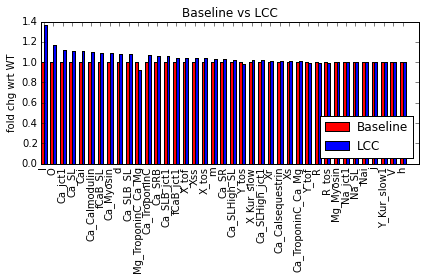

In [21]:
indSS = [5e3,15e3]
xlim = indSS
ao.StateDecompositionAnalysis(cases,wanted1="baseline",wanted2="lcc",indSS=indSS,xlim=xlim,ranked=39)

In [22]:
import Case 
casesLCC = dict()

In [23]:
casesLCC['lcc'] = Case.Case(tag="LCC",label="LCC")
casesLCC['lcc'].name = root+reducedFiles[0]

In [24]:
ao.LoadPickles(casesLCC)

#  lcc
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_lcc1p25x_freq1p0_60_red.pickle
Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_lcc1p25x_freq1p0_60_red.pickle


/usr/lib/python2.7/dist-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


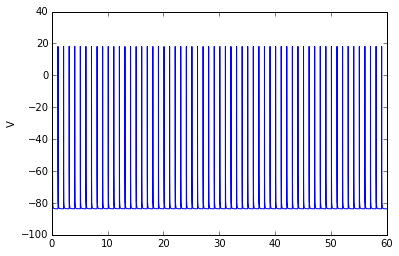

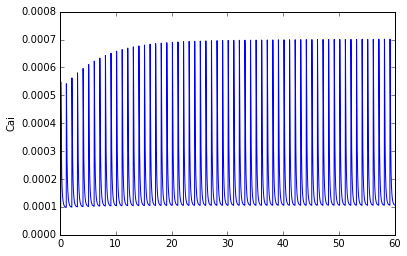

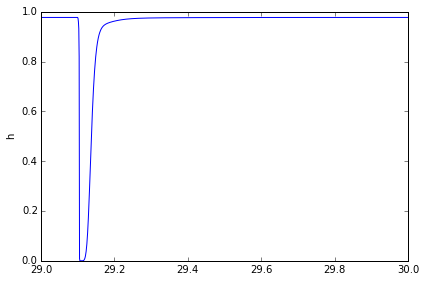

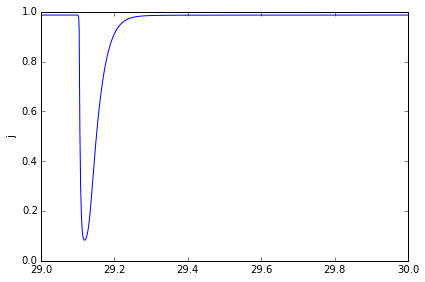

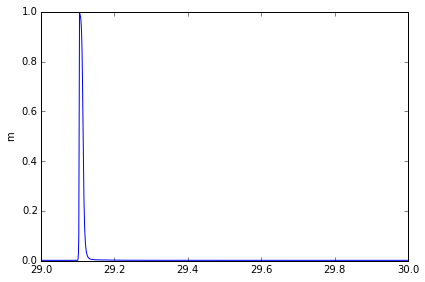

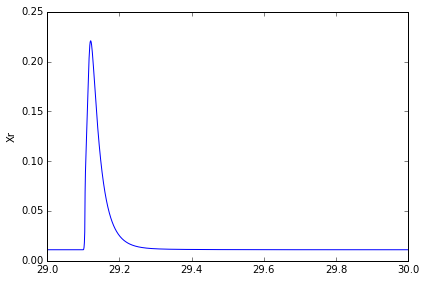

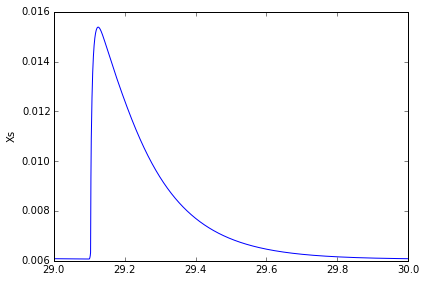

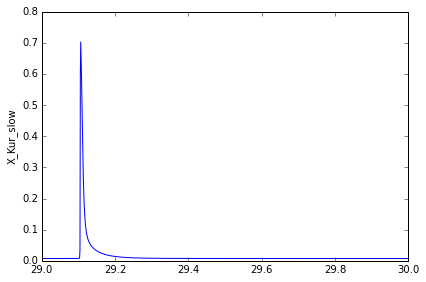

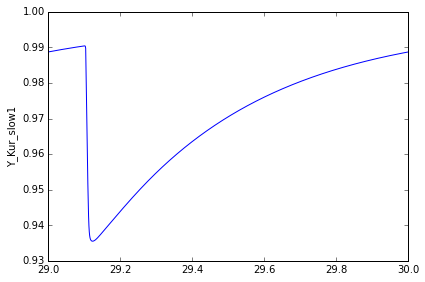

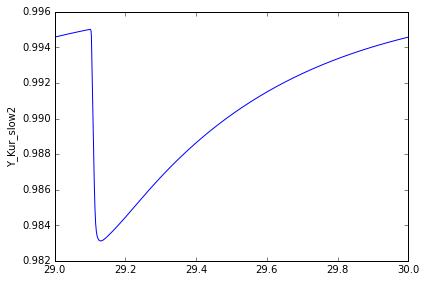

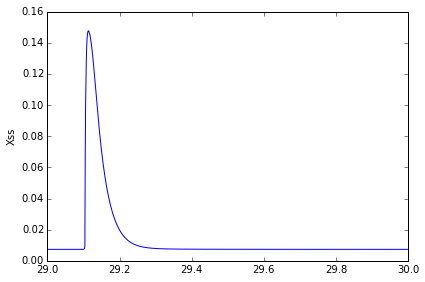

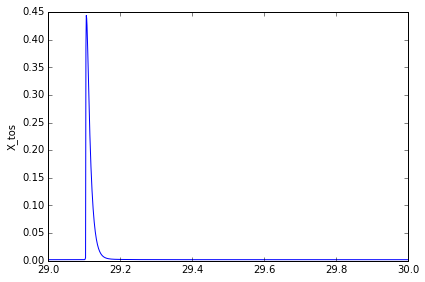

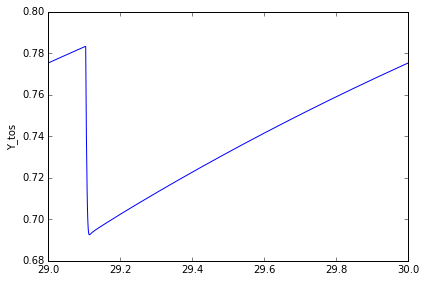

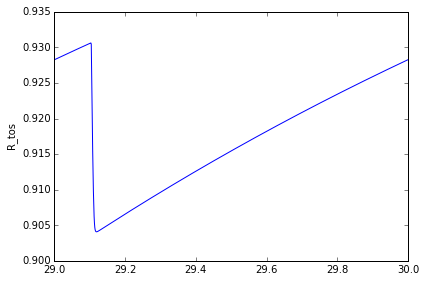

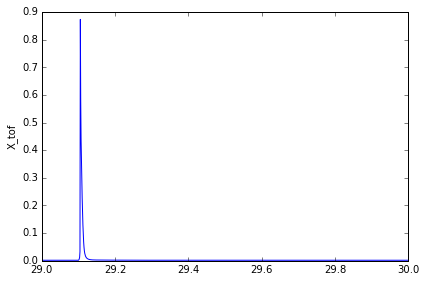

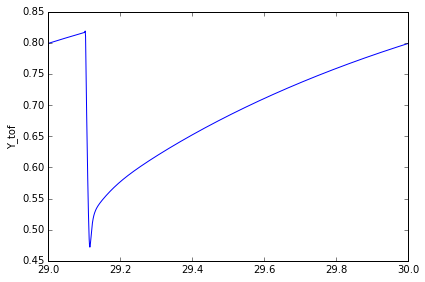

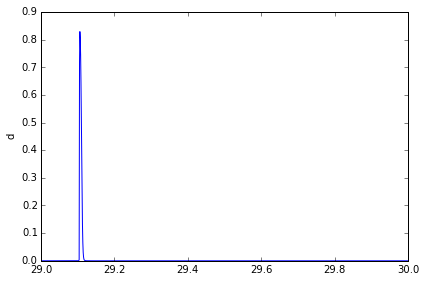

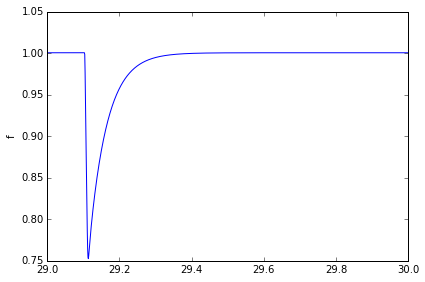

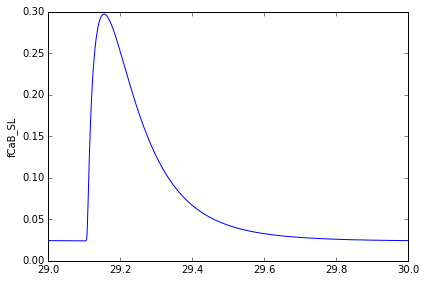

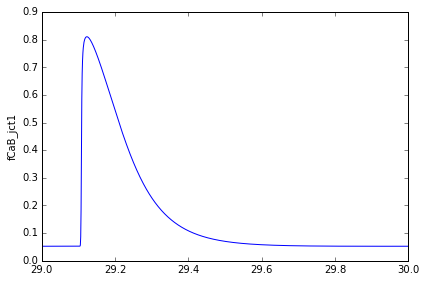

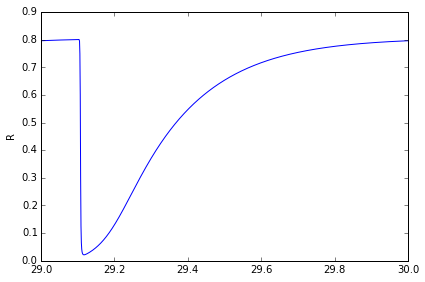

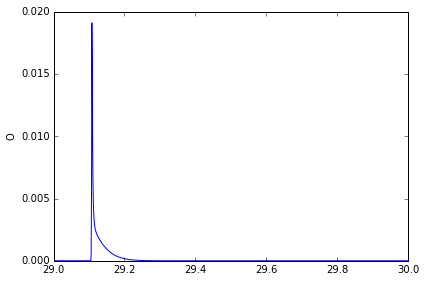

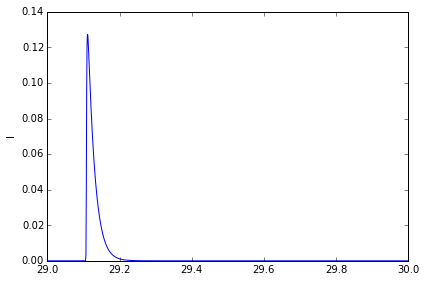

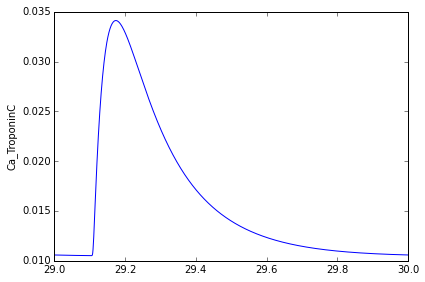

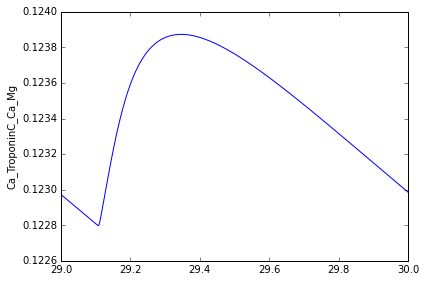

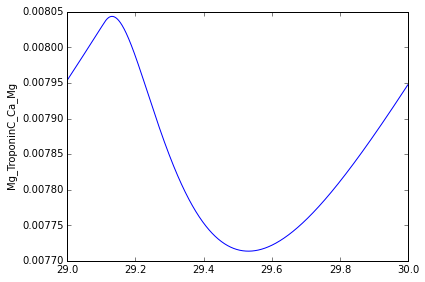

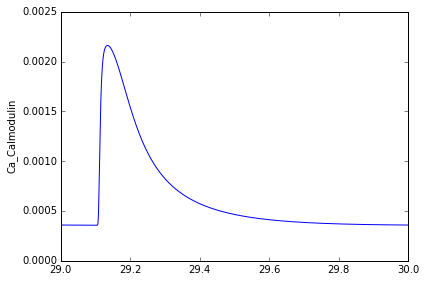

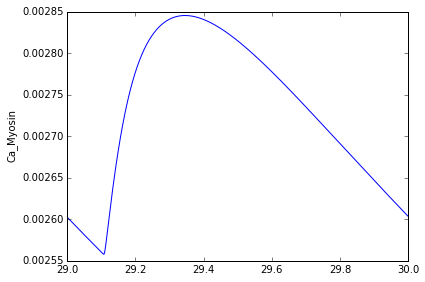

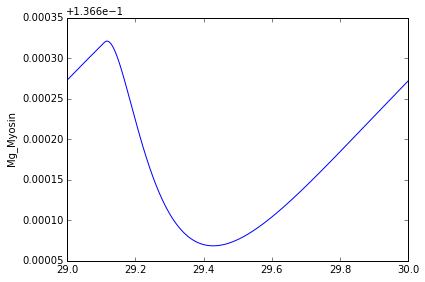

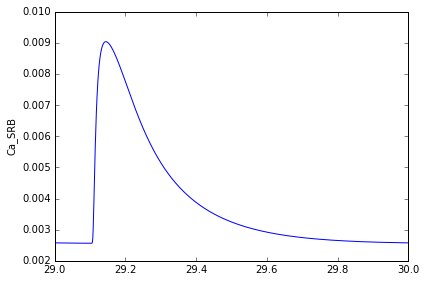

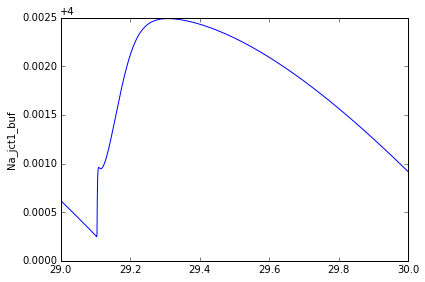

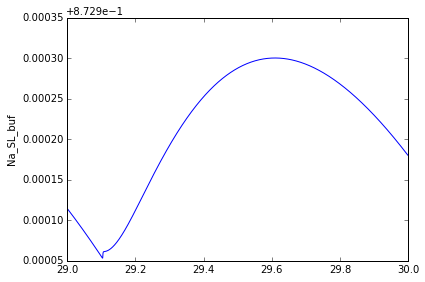

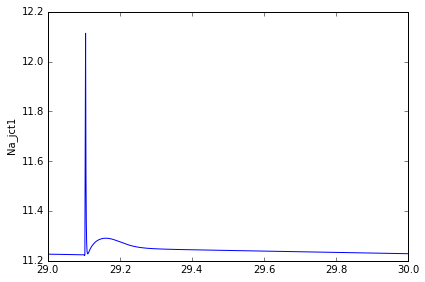

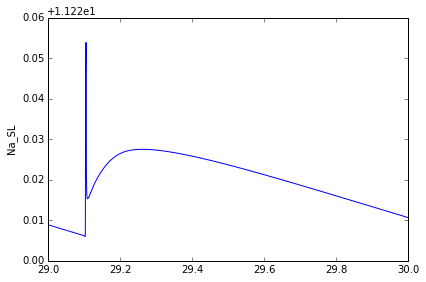

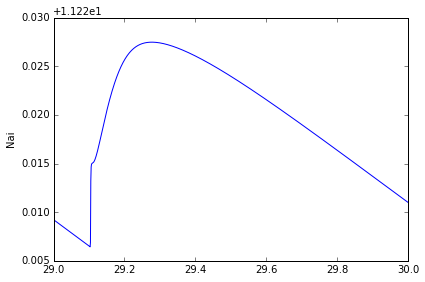

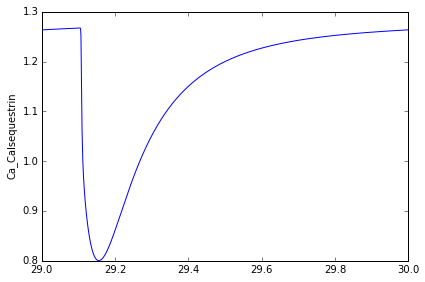

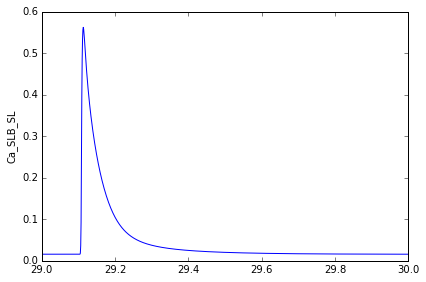

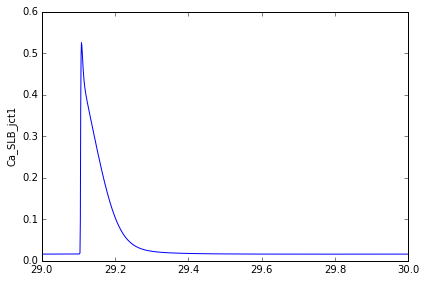

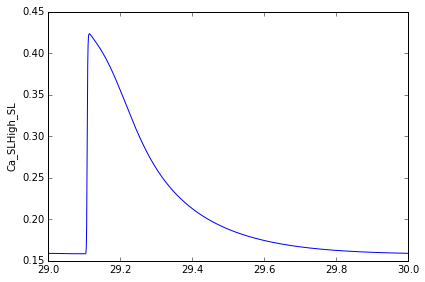

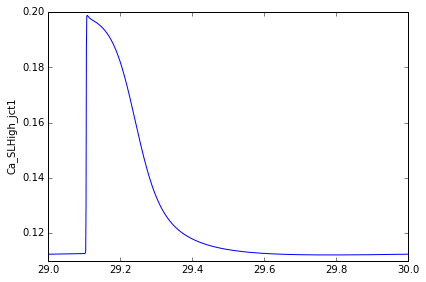

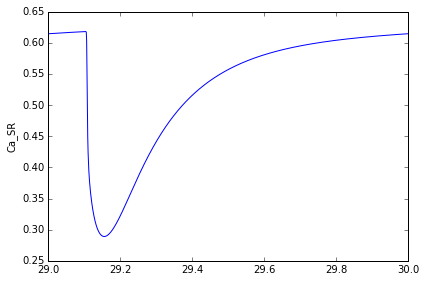

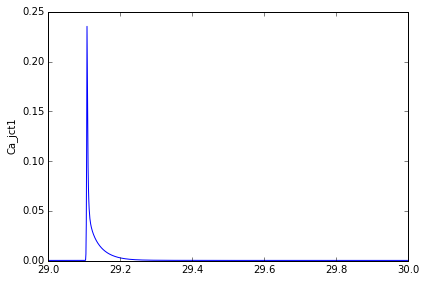

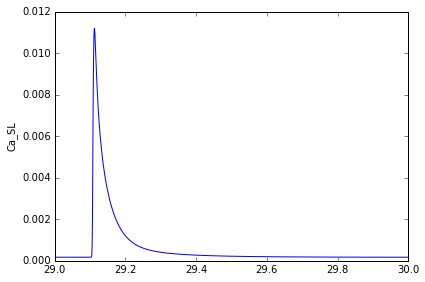

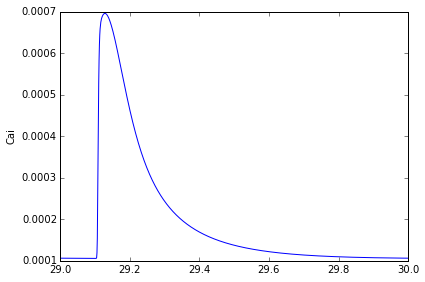

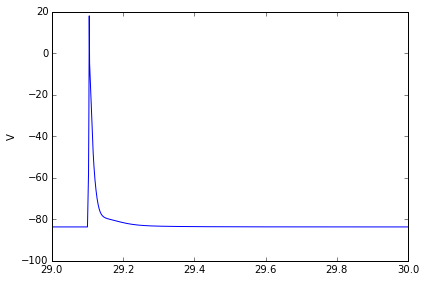

In [25]:
def myplot(case,label1,xlim=[0,-1]):
    plt.figure()
    ti = case.data['t']
    si = case.data['s']
    s_idx = case.data['s_idx']
    #print np.shape(s_idx)
    idx1 = s_idx.index(label1)
    ti_vals = ti[xlim[0]:xlim[1]]
    si_vals = si[xlim[0]:xlim[1],idx1]
    plt.plot(ti_vals/1e3,si_vals,label = case.label)
    plt.ylabel(label1)

trialCase = casesLCC['lcc']    
myplot(trialCase,"V")#,xlim=[55e3,60e3])    
myplot(trialCase,"Cai")#,xlim=[55e3,60e3])    
    

data = trialCase.data
for state in data['s_idx']:
    myplot(trialCase,state,xlim=[29e3,30e3])    
    1

    plt.tight_layout()
    plt.gcf().savefig(root+"LCC_singleWave_%s"%state+".png")    

In [26]:

cases = dict()

class empty:pass
root = "/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
case = empty()
case.caseName = "mouse_leak1p25x_freq1p0_60"
case.fileName = root+case.caseName+"_red.pickle"
case.data = ao.readPickle(case.fileName) 
cases[case.caseName] = case


case_lcc = empty()
case_lcc.caseName = "mouse_lcc1p25x_freq1p0_60"
case_lcc.fileName = root+case_lcc.caseName+"_red.pickle"
case_lcc.data = ao.readPickle(case_lcc.fileName) 
cases[case_lcc.caseName] = case_lcc

Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_leak1p25x_freq1p0_60_red.pickle
Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_lcc1p25x_freq1p0_60_red.pickle


In [27]:
from analyzeODE import PlotMorotti

In [28]:
case_lcc = cases['mouse_lcc1p25x_freq1p0_60']
j_idx = case_lcc.data['j_idx']
for i, stringer in enumerate(j_idx):
    if "i_" in stringer:
        1
        #print stringer

case = cases['mouse_leak1p25x_freq1p0_60']
j_idx = case.data['j_idx']
for i, stringer in enumerate(j_idx):
    if "i_" in stringer:
        1
        #print stringer

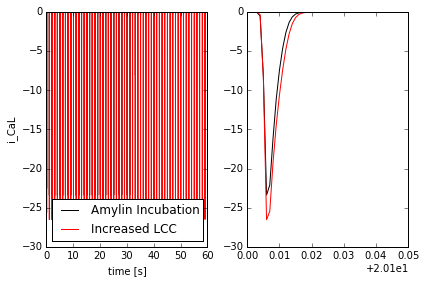

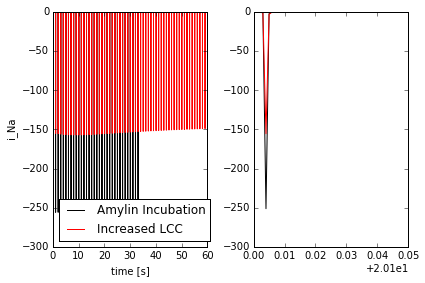

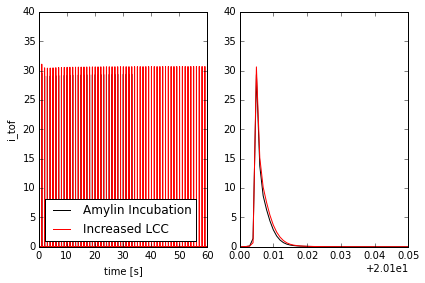

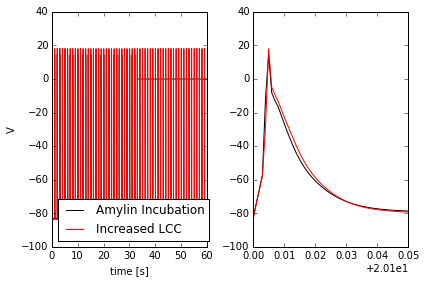

In [29]:
root="/net/share/shared/papers/despa/"
states = ["i_CaL","i_Na","i_tof","V"]
for i,state in enumerate(states):
  ao.PlotPickleData(case.data,data2=case_lcc.data,idxName=state, 
                          ylabel=state,trange=[20.1e3,20.15e3],
                          case1legend="Amylin Incubation",
                          case2legend="Increased LCC")
  plt.tight_layout()
  plt.gcf().savefig(root+"LCCvsLeak_%s"%state+".png")  

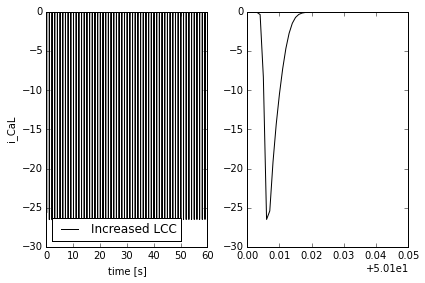

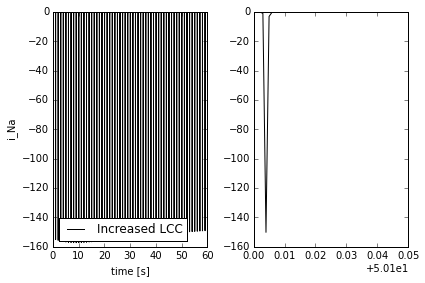

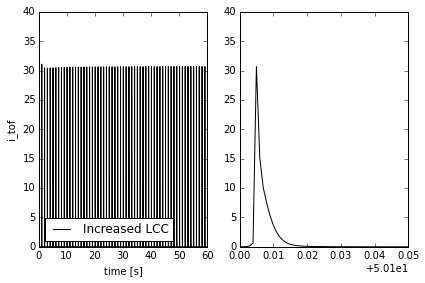

In [30]:
root="/net/share/shared/papers/despa/"
states = ["i_CaL","i_Na","i_tof"]
for i,state in enumerate(states):
  ao.PlotPickleData(case_lcc.data,idxName=state, 
                          ylabel=state,trange=[50.1e3,50.15e3],
                          case1legend="Increased LCC")
  plt.tight_layout()
  plt.gcf().savefig(root+case_lcc.caseName+"_%s"%state+".png")  

## HIP

In [9]:
import downSamplePickles
root = "/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
files = ["mouse_decrSERCAuptake0p50_leak1p25x_freq1p0_60.pickle","mouse_freq1p0_60.pickle"]
reducedFiles = [ x.replace(".pickle","_red.pickle") for x in files]

if 0:
    for i,file in enumerate(files):
        fileName = root+file
        print fileName
        downSamplePickles.downsample(fileName,10)

print reducedFiles

['mouse_decrSERCAuptake0p50_leak1p25x_freq1p0_60_red.pickle', 'mouse_freq1p0_60_red.pickle']


In [10]:
import Case 
cases = dict()

In [11]:
cases['baseline'] = Case.Case(tag="Baseline",label="Baseline")
cases['baseline'].name = root+reducedFiles[1]
cases['hip'] = Case.Case(tag="HIP",label="HIP")
cases['hip'].name = root+reducedFiles[0]

In [12]:
ao.LoadPickles(cases,noOverwrite=True)

#  hip
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_decrSERCAuptake0p50_leak1p25x_freq1p0_60_red.pickle
Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_decrSERCAuptake0p50_leak1p25x_freq1p0_60_red.pickle


IOError: [Errno 2] No such file or directory: '/home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_decrSERCAuptake0p50_leak1p25x_freq1p0_60_red.pickle'

In [13]:
ignoreList = cases['baseline'].data['j_idx']
ignoreList = [s for s in ignoreList if "i_" not in s]# and "j_" not in s]
print ignoreList

AttributeError: Case instance has no attribute 'data'

In [14]:
ignoreList = ['Vol_Cell', 'Vol_SR', 'Vol_SL', 'Vol_jct1', 'Vol_myo', 'E_Na_jct1', 'E_Na_SL', 'E_Ca_jct1', 'E_Ca_SL', \
              'E_K', 'E_Cl', 'openProb', 'alpha_h', 'beta_h', 'alpha_j', 'beta_j', 'alpha_m', 'beta_m', 'sigma', 'f_NaK',\
              'Xr_infinity', 'tau_Xr', 'Rr', 'pCa_jct1', 'pCa_SL', 'G_Ks_jct1', 'G_Ks_SL', 'E_Ks', 'Xs_infinity', \
              'tau_Xs', 'X_Kur_slowss', 'tau_Xkur', 'Y_Kur_slowss', 'tau_Ykur1', 'tau_Ykur2', 'a_Kur', 'fIKuravail',\
              'xssss', 'tauxss', 'X_tos_infinity', 'tau_X_tos', 'Y_tos_infinity', 'tau_Y_tos', 'R_tos_infinity', \
              'tau_R_tos', 'X_tof_infinity', 'tau_X_tof', 'Y_tof_infinity', 'tau_Y_tof', 'alpha_K1', 'beta_K1',\
              'K1_infinity', 'd_infinity', 'tau_d', 'f_infinity', 'tau_f', 'fCa_SL', 'fCa_jct1', 'temp_jct1', 'temp_SL',\
              'Q_NCX', 'Ka_SL', 'Ka_jct1', 'Q_SLCaP', 'kCaSR', 'koSRCa', 'kiSRCa', 'RI', 'j_rel_SR', 'j_leak_SR', \
              'Q_SRCaP', 'j_pump_SR', 'J_Na_jct1_SL', 'J_Na_SL_myo', 'J_Ca_jct1_SL', 'J_Ca_SL_myo', 'dCa_TroponinC',\
              'dCa_TroponinC_Ca_Mg', 'dMg_TroponinC_Ca_Mg', 'dCa_Calmodulin', 'dCa_Myosin', 'dMg_Myosin', 'dCa_SRB',\
              'dCa_cytosol_tot_bound', 'G_IKr', 'G_K1', 'Q_CaL', 'temp', 'dNa_jct1_buf', 'dNa_SL_buf', 'dCalsequestrin',\
              'dCa_SLB_SL', 'dCa_SLB_jct1', 'dCa_SLHigh_SL', 'dCa_SLHigh_jct1', 'dCa_jct1_tot_bound', 'dCa_SL_tot_bound',\
              'i_Na_SL', 'i_Na_jct1','i_Nab_SL', 'i_Nab_jct1','i_Cab_SL', 'i_Cab_jct1','i_Cap_SL', 'i_Cap_jct1',\
              'i_NaCa_SL', 'i_NaCa_jct1','i_Ca_SL_tot','i_Ca_jct1_tot','i_NaK_SL', 'i_NaK_jct1','i_CaL_Ca_SL', \
              'i_CaL_Ca_jct1','i_CaL_Na_SL', 'i_CaL_Na_jct1']

In [15]:
 'i_Na_SL', 'i_Na_jct1',\
'i_Nab_SL', 'i_Nab_jct1','i_Cab_SL', 'i_Cab_jct1','i_Cap_SL', 'i_Cap_jct1','i_NaCa_SL', 'i_NaCa_jct1','i_Ca_SL_tot',\
'i_Ca_jct1_tot','i_NaK_SL', 'i_NaK_jct1','i_CaL_Ca_SL', 'i_CaL_Ca_jct1','i_CaL_Na_SL', 'i_CaL_Na_jct1'

('i_Na_SL',
 'i_Na_jct1',
 'i_Nab_SL',
 'i_Nab_jct1',
 'i_Cab_SL',
 'i_Cab_jct1',
 'i_Cap_SL',
 'i_Cap_jct1',
 'i_NaCa_SL',
 'i_NaCa_jct1',
 'i_Ca_SL_tot',
 'i_Ca_jct1_tot',
 'i_NaK_SL',
 'i_NaK_jct1',
 'i_CaL_Ca_SL',
 'i_CaL_Ca_jct1',
 'i_CaL_Na_SL',
 'i_CaL_Na_jct1')

In [16]:
indSS = [5e3,15e3]
xlim = indSS
StateDecompositionAnalysisHIP(cases,wanted1="baseline",wanted2="hip",indSS=indSS,xlim=xlim,\
                              mode="fluxes",ranked=39,ignoreList=ignoreList)

NameError: name 'StateDecompositionAnalysisHIP' is not defined

## Amylin Incubation

In [120]:
import downSamplePickles
root = "/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
files = ["mouse_leak1p25x_freq1p0_60.pickle","mouse_freq1p0_60.pickle"]
reducedFiles = [ x.replace(".pickle","_red.pickle") for x in files]

if 0:
    for i,file in enumerate(files):
        fileName = root+file
        print fileName
        downSamplePickles.downsample(fileName,10)

print reducedFiles

['mouse_leak1p25x_freq1p0_60_red.pickle', 'mouse_freq1p0_60_red.pickle']


In [121]:
import Case 
cases = dict()

In [122]:
cases['baseline'] = Case.Case(tag="Baseline",label="Baseline")
cases['baseline'].name = root+reducedFiles[1]
cases['amylin'] = Case.Case(tag="Amylin Incubation",label="Amylin Incubation")
cases['amylin'].name = root+reducedFiles[0]

In [123]:
ao.LoadPickles(cases,noOverwrite=True)

#  amylin
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_leak1p25x_freq1p0_60_red.pickle
Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_leak1p25x_freq1p0_60_red.pickle
#  baseline
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle
Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle


Selecting  baseline
Selecting  amylin
#  Baseline
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle
Skipping read, since already populated
#  Amylin Incubation
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_leak1p25x_freq1p0_60_red.pickle
Skipping read, since already populated
/home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle
/home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_leak1p25x_freq1p0_60_red.pickle
Skipping  dNa_SL_buf
Skipping  dNa_jct1_buf
Skipping  dCa_SL_tot_bound
Skipping  dCa_SLB_SL
Skipping  dCa_SLHigh_SL
Skipping  openProb
Skipping  dCa_SRB
Skipping  i_Na_SL
i_Na pct 0.64 0 -1.6e-01/1.0e+00 1 -2.6e-01/1.6e+00
Skipping  dCa_TroponinC
Skipping  i_Na_jct1
Skipping  dCa_Myosin
Skipping  dMg_Myosin
i_Kp pct -0.42 0 1.1e-06/1.0e+00 1 6.5e-07/5.8e-01
Skipping  dCalsequestrin
Skipping  dCa_cytosol_tot_bound
Skipping  dCa_SLHigh_jct1
Skipping  i_Nab_SL
i_Nab pct 0.24 0 -2.0e-01/1.0e+00 1 -2.5e-01/1.2e+0

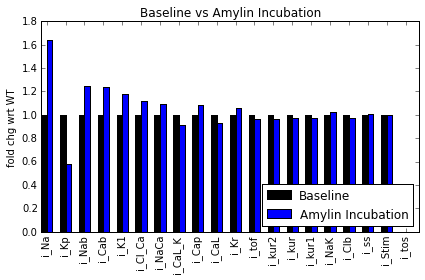

In [126]:
indSS = [5e3,15e3]
xlim = indSS
StateDecompositionAnalysisAmylin(cases,wanted1="baseline",wanted2="amylin",indSS=indSS,xlim=xlim,ignoreList=ignoreList, \
                              mode="fluxes")

## LCC vs. Leak

In [ ]:
import downSamplePickles
root = "/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
files = ["mouse_leak1p25x_freq1p0_60.pickle","mouse_lcc1p25x_freq1p0_60.pickle"]
reducedFiles = [ x.replace(".pickle","_red.pickle") for x in files]

if 1:
    for i,file in enumerate(files):
        fileName = root+file
        print fileName
        downSamplePickles.downsample(fileName,10)

print reducedFiles

In [ ]:
cases['lcc'] = Case.Case(tag="LCC",label="LCC")
cases['lcc'].name = root+reducedFiles[0]
cases['amylin'] = Case.Case(tag="Amylin Incubation",label="Amylin Incubation")
cases['amylin'].name = root+reducedFiles[1]

In [ ]:
0.9**3

In [ ]:
indSS = [29e3,30e3]
xlim = indSS
ao.StateDecompositionAnalysis(cases,wanted1="amylin",wanted2="lcc",indSS=indSS,xlim=xlim,ranked=15)

In [ ]:
indSS = [29e3,30e3]
xlim = indSS
ao.StateDecompositionAnalysis(cases,wanted1="lcc",indSS=indSS,xlim=xlim,ranked=39)

## LCC vs. NCX

In [ ]:
import downSamplePickles
root = "/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
files = ["mouse_lcc1p25x_freq1p0_60.pickle","mouse_ncx1p25x_freq1p0_60.pickle"]
reducedFiles = [ x.replace(".pickle","_red.pickle") for x in files]

if 1:
    for i,file in enumerate(files):
        fileName = root+file
        print fileName
        downSamplePickles.downsample(fileName,10)

print reducedFiles

In [ ]:
cases['lcc'] = Case.Case(tag="LCC",label="LCC")
cases['lcc'].name = root+reducedFiles[0]
cases['ncx'] = Case.Case(tag="NCX",label="NCX")
cases['ncx'].name = root+reducedFiles[1]

In [ ]:
indSS = [29e3,30e3]
xlim = indSS
ao.StateDecompositionAnalysis(cases,wanted1="lcc",wanted2="ncx",indSS=indSS,xlim=xlim,ranked=15)

#### Test for long simulation
<code>
python daisychain.py  -odeName shannon_2004_mouse.ode -var stim_period 1000.000000  -iters 4 -T 30000.000000 -name ./despa_test.pickle
</code>

Files are huge, so should probably do this in a terminal session, not ipython 

In [ ]:
import daisychain as dc
if 1: 
  pickleNames=['despa_test_1.pickle','despa_test_2.pickle','despa_test_3.pickle','despa_test_4.pickle','despa_test_5.pickle']
  data = dc.ConcatenateTrajs(pickleNames,downsampleRate=10,writeCat=True)


In [ ]:
cases2 = dict()
cases2['ref'] = Case.Case(tag="baseline",label="baseline")
cases2['ref'].name = "despa_test_cat.pickle"


In [ ]:
ao.LoadPickles(cases2)

In [ ]:
def myplot(case,label1,xlim=[0,-1]):
    plt.figure()
    ti = case.data['t']
    si = case.data['s']
    s_idx = case.data['s_idx']
    #print np.shape(s_idx)
    idx1 = s_idx.index(label1)
    ti_vals = ti[xlim[0]:xlim[1]]
    si_vals = si[xlim[0]:xlim[1],idx1]
    plt.plot(ti_vals/1e3,si_vals,label = case.label)
    plt.ylabel(label1)

trialCase = cases2['ref']    
myplot(trialCase,"V")#,xlim=[55e3,60e3])    
myplot(trialCase,"Cai")#,xlim=[55e3,60e3])    
    

data = trialCase.data
for state in data['s_idx']:
    myplot(trialCase,state,xlim=[55e3,60e3])    
    1

In [ ]:
def myplot(case,label1,xlim=[0,-1]):
    plt.figure()
    ti = case.data['t']
    si = case.data['s']
    s_idx = case.data['s_idx']
    #print np.shape(s_idx)
    idx1 = s_idx.index(label1)
    ti_vals = ti[xlim[0]:xlim[1]]
    si_vals = si[xlim[0]:xlim[1],idx1]
    plt.plot(ti_vals/1e3,si_vals,label = case.label)
    plt.ylabel(label1)

trialCase = cases2['ref']    
myplot(trialCase,"V",xlim=[240e3,300e3])    
myplot(trialCase,"Cai",xlim=[240e3,300e3])    
    
trialCase = cases2['ref']    
myplot(trialCase,"V",xlim=[0e3,60e3])    
myplot(trialCase,"Cai",xlim=[0e3,60e3])    

#data = trialCase.data
#for state in data['s_idx']:
#    myplot(trialCase,state,xlim=[240e3,300e3])    
#    1

## Four canonical cases

In [ ]:
import downSamplePickles
root = "/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
files = ["mouse_decrSERCAuptake0p50_freq1p0_60.pickle","mouse_decrSERCAuptake0p50_leak1p25x_freq1p0_60.pickle"]
reducedFiles = [ x.replace(".pickle","_red.pickle") for x in files]

if 1:
    for i,file in enumerate(files):
        fileName = root+file
        print fileName
        downSamplePickles.downsample(fileName,10)

print reducedFiles

In [ ]:
import downSamplePickles
root = "/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
files = ["mouse_freq1p0_60.pickle","mouse_leak1p25x_freq1p0_60.pickle",\
         "mouse_decrSERCAuptake0p50_freq1p0_60.pickle","mouse_decrSERCAuptake0p50_leak1p25x_freq1p0_60.pickle"]
reducedFiles = [ x.replace(".pickle","_red.pickle") for x in files]

if 0:
    for i,file in enumerate(files):
        fileName = root+file
        print fileName
        downSamplePickles.downsample(fileName,10)

print reducedFiles

In [ ]:
cases['baseline'] = Case.Case(tag="Baseline",label="Baseline")
cases['baseline'].name = root+reducedFiles[0]
cases['amylin'] = Case.Case(tag="Amylin",label="Amylin")
cases['amylin'].name = root+reducedFiles[1]
cases['ucd'] = Case.Case(tag="UCD",label="UCD")
cases['ucd'].name = root+reducedFiles[2]
cases['hip'] = Case.Case(tag="HIP",label="HIP")
cases['hip'].name = root+reducedFiles[3]

In [ ]:
ao.LoadPickles(cases,noOverwrite=True)

## Currents

In [ ]:
ignoreList = cases['baseline'].data['j_idx']
ignoreList = [s for s in ignoreList if "i_" not in s]
print ignoreList

In [ ]:
indSS = [5e3,15e3]
xlim = indSS
ao.StateDecompositionAnalysis(cases,wanted1="baseline",wanted2="amylin",wanted3="hip",wanted4="ucd",\
                              indSS=indSS,xlim=xlim,mode="fluxes",ranked=39)

In [ ]:
def LoadPickles(caseDict,noOverwrite=False):
  for key,case in caseDict.iteritems():
    print "# ", key
    print "Loading "  , case.name

    if hasattr(case,'data') and noOverwrite==True:
      print "Skipping read, since already populated"
    else:
      case.data = readPickle(case.name)

In [ ]:
def StateDecompositionAnalysis(caseDict, \
                  wanted1="baseline",wanted2="incrleak",
                  wanted3="baseline",wanted4="incrleak",
                  indSS=[2e3,-1], # Time aftter which data is used for comparative analysis. -1 signifies getting last time step  [ms]
                  xlim=None,
                  root="./",
                  ranked=20,
                  ignoreList = ["dNa_SL_buf"],
                  mode="states" # fluxes
                 ):

  # we want to compare only two of the cases, so select these here    
  #wanted =["baseline1Hz","baseline0.25Hz"]# ,"2xincrleak0.25Hz"]
  #wanted =["baseline0.25Hz","2xincrleak0.25Hz"]
  subCaseDict = dict()
  wanted =[wanted1,wanted2,wanted3,wanted4]
  for idx, wantedi in enumerate(wanted):
    for key, case in caseDict.iteritems():
    #if key in wanted:
      if key == wantedi:
        print "Selecting ", key
        case.idx = idx
        subCaseDict[ case.tag ]  = case
        #print np.shape(case.data['s']) 

  # Load data 
  LoadPickles(subCaseDict,noOverwrite=True)


  # decide on which data to pull
  if mode=="states":
    v_key = 's'
  elif mode=="fluxes":
    v_key = 'j'
  else:
    raise RuntimeError(mode +" not understood")


  # for two cases, perform psd analysis to obtain mean and PSD
  caseComp = [None,None,None,None]
  for key, case in subCaseDict.iteritems():
      print case.name
      t = case.data['t']

      v = case.data[v_key]
      sub = v[indSS[0]:indSS[1]]
      case.dc, case.psd2 = ao.PSDAnaly(sub,verbose=False)
      caseComp[ case.idx ] = case


  ## displaycomparison
  cols = ["k","r","b","g"]
  # get shortest traj
  lastT = 1e30
  for key, case in subCaseDict.iteritems():
      ti = case.data['t']
      # pick whichever T is smallest: max length of either trajector or the xlim bound
      if xlim!=None:
        lastT = np.min([ti[-1],lastT,xlim[1]])
      else:
        lastT = np.min([ti[-1],lastT])
  if xlim==None:
    xlim = [0,lastT]
  def PlotValueComparison(label1):
    plt.figure()
    fig, ax1 = plt.subplots()
    i=0
    cols = ["k","r","b","g"]
    #ylims = [1e90,-1e90]
    for key, case in subCaseDict.iteritems():
      ti = case.data['t']

      vi = case.data[v_key]
      v_idx = case.data['%s_idx'%v_key]

      idx1 = v_idx.index(label1)

      ti_vals = ti[xlim[0]:xlim[1]]
      vi_vals = vi[xlim[0]:xlim[1],idx1]
      ax1.plot(ti_vals,vi_vals,cols[i]+"-",label = case.label)

      i+=1

    #ax1.set_ylim([0,1.5e-3])
    ax1.set_xlim(xlim)
    #plt.title("Action potential") 
    ax1.set_ylabel("%s [unk]"%label1)
    plt.legend()
    plt.gcf().savefig(root+"%s_%s_%s_%s.png"%(mode,label1,wanted1,wanted2),dpi=300)




  ## Quantify (pct error) change in mean value of each state
  # normalize by case 1
  def donorm(subj,ref):
    eps = 1e-9
    nonZero = np.argwhere(np.abs(ref.dc)>eps)
    subj.dcn = np.zeros( np.shape(ref.dc) )
    subj.dcn[ nonZero ] = subj.dc[ nonZero ] / ref.dc[ nonZero ]
  #caseComp[0].dcn = caseComp[0].dc/caseComp[0].dc
  #caseComp[1].dcn = caseComp[1].dc/caseComp[0].dc
  donorm(caseComp[0],caseComp[0])
  donorm(caseComp[1],caseComp[0])
  donorm(caseComp[2],caseComp[0])
  donorm(caseComp[3],caseComp[0])
  valueChg = caseComp[1].dcn-caseComp[0].dcn
  sort_index = (np.argsort(np.abs(valueChg)))[::-1]


  #Assuming that both pickle files have same states/ode model. 
  v_idx = case.data['%s_idx'%v_key]
  value_inds = {key: idx for (idx, key) in enumerate(v_idx)}
  # create reverse lookup
  value_inds_rev = {idx: key for (idx, key) in enumerate(v_idx)}

  # grabbing top-twenty modulated states
  bestidx    = []
  bestvalues = []

  stored = 0
  for i,idx in enumerate(sort_index):
          if idx not in value_inds_rev:

              raise ValueError("Unknown state/flux: '{0}'".format(idx))

          if value_inds_rev[idx] in ignoreList:
            print "Skipping ", value_inds_rev[idx]
            continue

          print value_inds_rev[idx],"pct %4.2f"%valueChg[idx], \
                                      "0 %4.1e/%4.1e"% (caseComp[0].dc[idx],caseComp[0].dcn[idx]),\
                                      "1 %4.1e/%4.1e"% (caseComp[1].dc[idx],caseComp[1].dcn[idx])
          bestidx.append(idx)
          bestvalues.append(value_inds_rev[idx])
          #print beststates[i]
          #indices.append(state_inds[state])

          stored+=1
          if stored>=ranked:
            break

  ## Plot State Data 
  if mode == "states":
    plotValues = ["V","Cai","Ca_SR"] + bestvalues
  elif mode =="fluxes":
    plotValues = ["i_Cab"] + bestvalues

  #
  #for label in plotValues:
  #  PlotValueComparison(label)


  ## Plot comparative data 
  width=0.3
  plt.figure()
  fig, ax = plt.subplots()
  ind = np.arange(ranked)

  dc0s = caseComp[0].dcn
  rects1 = ax.bar(ind, dc0s[bestidx], width,color='k')

  dc1s = caseComp[1].dcn
  rects2 = ax.bar(ind+width, dc1s[bestidx], width,color='r')

  dc2s = caseComp[2].dcn
  rects3 = ax.bar(ind+2*width, dc2s[bestidx], width,color='b')

  dc3s = caseComp[3].dcn
  rects4 = ax.bar(ind+3*width, dc3s[bestidx], width,color='g')
    
  ax.set_xticks(ind+4*width)
  ax.set_xticklabels( bestvalues,rotation=90 )


  lb1 =caseComp[0].label
  lb2= caseComp[1].label
  lb3 =caseComp[2].label
  lb4= caseComp[3].label
  plt.title("%s vs %s and %s and %s" % (lb1,lb2,lb3,lb4))
  ax.legend( (rects1[0], rects2[0],rects3[0], rects4[0] ), (lb1,lb2,lb3,lb4),loc=4 )
  ax.set_ylabel("fold chg wrt WT")
  plt.tight_layout()

  #plt.gcf().savefig(root+versionPrefix+"comparative.png",dpi=300)
  plt.gcf().savefig(root+"comparative_%s_%s_%s.png"%(mode,wanted1,wanted2),dpi=300)


In [117]:
def StateDecompositionAnalysisHIP(caseDict, \
                  wanted1="baseline",wanted2="incrleak",
                  indSS=[2e3,-1], # Time aftter which data is used for comparative analysis. -1 signifies getting last time step  [ms]
                  xlim=None,
                  root="./",
                  ranked=20,
                  ignoreList = ["dNa_SL_buf"],
                  mode="states" # fluxes
                 ):

  # we want to compare only two of the cases, so select these here    
  #wanted =["baseline1Hz","baseline0.25Hz"]# ,"2xincrleak0.25Hz"]
  #wanted =["baseline0.25Hz","2xincrleak0.25Hz"]
  subCaseDict = dict()
  wanted =[wanted1,wanted2]
  for idx, wantedi in enumerate(wanted):
    for key, case in caseDict.iteritems():
    #if key in wanted:
      if key == wantedi:
        print "Selecting ", key
        case.idx = idx
        subCaseDict[ case.tag ]  = case
        #print np.shape(case.data['s']) 

  # Load data 
  ao.LoadPickles(subCaseDict,noOverwrite=True)


  # decide on which data to pull
  if mode=="states":
    v_key = 's'
  elif mode=="fluxes":
    v_key = 'j'
  else:
    raise RuntimeError(mode +" not understood")


  # for two cases, perform psd analysis to obtain mean and PSD
  caseComp = [None,None]
  for key, case in subCaseDict.iteritems():
      print case.name
      t = case.data['t']

      v = case.data[v_key]

      #sub = s[1e4:5e4,0:10]
      #sub = s[1e4:5e4,]
      sub = v[indSS[0]:indSS[1]]
      case.dc, case.psd2 = ao.PSDAnaly(sub,verbose=False)
      caseComp[ case.idx ] = case

  ## displaycomparison
  cols = ["k","b"]
  # get shortest traj
  lastT = 1e30
  for key, case in subCaseDict.iteritems():
      ti = case.data['t']
      # pick whichever T is smallest: max length of either trajector or the xlim bound
      if xlim!=None:
        lastT = np.min([ti[-1],lastT,xlim[1]])
      else:
        lastT = np.min([ti[-1],lastT])
  if xlim==None:
    xlim = [0,lastT]

  def PlotValueComparison(label1):
    plt.figure()
    fig, ax1 = plt.subplots()
    i=0
    cols = ["k","b"]
    #ylims = [1e90,-1e90]
    for key, case in subCaseDict.iteritems():
      ti = case.data['t']

      vi = case.data[v_key]
      v_idx = case.data['%s_idx'%v_key]

      idx1 = v_idx.index(label1)

      ti_vals = ti[xlim[0]:xlim[1]]
      vi_vals = vi[xlim[0]:xlim[1],idx1]
      ax1.plot(ti_vals,vi_vals,cols[i]+"-",label = case.label)

      i+=1

    #ax1.set_ylim([0,1.5e-3])
    ax1.set_xlim(xlim)
    #plt.title("Action potential") 
    ax1.set_ylabel("%s [unk]"%label1)
    plt.legend()
    plt.gcf().savefig(root+"%s_%s_%s_%s.png"%(mode,label1,wanted1,wanted2),dpi=300)




  ## Quantify (pct error) change in mean value of each state
  # normalize by case 1
  def donorm(subj,ref):
    eps = 1e-9
    nonZero = np.argwhere(np.abs(ref.dc)>eps)
    subj.dcn = np.zeros( np.shape(ref.dc) )
    subj.dcn[ nonZero ] = subj.dc[ nonZero ] / ref.dc[ nonZero ]
  #caseComp[0].dcn = caseComp[0].dc/caseComp[0].dc
  #caseComp[1].dcn = caseComp[1].dc/caseComp[0].dc
  donorm(caseComp[0],caseComp[0])
  donorm(caseComp[1],caseComp[0])
  valueChg = caseComp[1].dcn-caseComp[0].dcn
  sort_index = (np.argsort(np.abs(valueChg)))[::-1]


  #Assuming that both pickle files have same states/ode model. 
  v_idx = case.data['%s_idx'%v_key]
  value_inds = {key: idx for (idx, key) in enumerate(v_idx)}
  # create reverse lookup
  value_inds_rev = {idx: key for (idx, key) in enumerate(v_idx)}

  # grabbing top-twenty modulated states
  bestidx    = []
  bestvalues = []

  stored = 0
  for i,idx in enumerate(sort_index):
          if idx not in value_inds_rev:
              raise ValueError("Unknown state/flux: '{0}'".format(idx))

          if value_inds_rev[idx] in ignoreList:
            print "Skipping ", value_inds_rev[idx]
            continue

          print value_inds_rev[idx],"pct %4.2f"%valueChg[idx], \
                                      "0 %4.1e/%4.1e"% (caseComp[0].dc[idx],caseComp[0].dcn[idx]),\
                                      "1 %4.1e/%4.1e"% (caseComp[1].dc[idx],caseComp[1].dcn[idx])
          bestidx.append(idx)
          bestvalues.append(value_inds_rev[idx])
          #print beststates[i]
          #indices.append(state_inds[state])

          stored+=1
          if stored>=ranked:
            break
  ## Plot State Data 
  if mode == "states":
    plotValues = ["V","Cai","Ca_SR"] + bestvalues
  elif mode =="fluxes":
    plotValues = ["i_Cab"] + bestvalues

  #
  #for label in plotValues:
  #  PlotValueComparison(label)


  ## Plot comparative data 
  width=0.3
  plt.figure()
  fig, ax = plt.subplots()
  ind = np.arange(ranked)

  dc0s = caseComp[0].dcn
  rects1 = ax.bar(ind, dc0s[bestidx], width,color='k')

  dc1s = caseComp[1].dcn
  rects2 = ax.bar(ind+width, dc1s[bestidx], width,color='r')

  ax.set_xticks(ind+width)
  ax.set_xticklabels( bestvalues,rotation=90 )


  lb1 =caseComp[0].label
  lb2= caseComp[1].label
  plt.title("%s vs %s" % (lb1,lb2))
  ax.legend( (rects1[0], rects2[0]), (lb1,lb2),loc=4 )
  ax.set_ylabel("fold chg wrt WT")
  plt.tight_layout()


  #plt.gcf().savefig(root+versionPrefix+"comparative.png",dpi=300)
  plt.gcf().savefig(root+"comparative_%s_%s_%s.png"%(mode,wanted1,wanted2),dpi=300)
        

In [119]:
def StateDecompositionAnalysisAmylin(caseDict, \
                  wanted1="baseline",wanted2="incrleak",
                  indSS=[2e3,-1], # Time aftter which data is used for comparative analysis. -1 signifies getting last time step  [ms]
                  xlim=None,
                  root="./",
                  ranked=20,
                  ignoreList = ["dNa_SL_buf"],
                  mode="states" # fluxes
                 ):

  # we want to compare only two of the cases, so select these here    
  #wanted =["baseline1Hz","baseline0.25Hz"]# ,"2xincrleak0.25Hz"]
  #wanted =["baseline0.25Hz","2xincrleak0.25Hz"]
  subCaseDict = dict()
  wanted =[wanted1,wanted2]
  for idx, wantedi in enumerate(wanted):
    for key, case in caseDict.iteritems():
    #if key in wanted:
      if key == wantedi:
        print "Selecting ", key
        case.idx = idx
        subCaseDict[ case.tag ]  = case
        #print np.shape(case.data['s']) 

  # Load data 
  ao.LoadPickles(subCaseDict,noOverwrite=True)


  # decide on which data to pull
  if mode=="states":
    v_key = 's'
  elif mode=="fluxes":
    v_key = 'j'
  else:
    raise RuntimeError(mode +" not understood")


  # for two cases, perform psd analysis to obtain mean and PSD
  caseComp = [None,None]
  for key, case in subCaseDict.iteritems():
      print case.name
      t = case.data['t']

      v = case.data[v_key]

      #sub = s[1e4:5e4,0:10]
      #sub = s[1e4:5e4,]
      sub = v[indSS[0]:indSS[1]]
      case.dc, case.psd2 = ao.PSDAnaly(sub,verbose=False)
      caseComp[ case.idx ] = case

  ## displaycomparison
  cols = ["k","b"]
  # get shortest traj
  lastT = 1e30
  for key, case in subCaseDict.iteritems():
      ti = case.data['t']
      # pick whichever T is smallest: max length of either trajector or the xlim bound
      if xlim!=None:
        lastT = np.min([ti[-1],lastT,xlim[1]])
      else:
        lastT = np.min([ti[-1],lastT])
  if xlim==None:
    xlim = [0,lastT]

  def PlotValueComparison(label1):
    plt.figure()
    fig, ax1 = plt.subplots()
    i=0
    cols = ["k","b"]
    #ylims = [1e90,-1e90]
    for key, case in subCaseDict.iteritems():
      ti = case.data['t']

      vi = case.data[v_key]
      v_idx = case.data['%s_idx'%v_key]

      idx1 = v_idx.index(label1)

      ti_vals = ti[xlim[0]:xlim[1]]
      vi_vals = vi[xlim[0]:xlim[1],idx1]
      ax1.plot(ti_vals,vi_vals,cols[i]+"-",label = case.label)

      i+=1

    #ax1.set_ylim([0,1.5e-3])
    ax1.set_xlim(xlim)
    #plt.title("Action potential") 
    ax1.set_ylabel("%s [unk]"%label1)
    plt.legend()
    plt.gcf().savefig(root+"%s_%s_%s_%s.png"%(mode,label1,wanted1,wanted2),dpi=300)




  ## Quantify (pct error) change in mean value of each state
  # normalize by case 1
  def donorm(subj,ref):
    eps = 1e-9
    nonZero = np.argwhere(np.abs(ref.dc)>eps)
    subj.dcn = np.zeros( np.shape(ref.dc) )
    subj.dcn[ nonZero ] = subj.dc[ nonZero ] / ref.dc[ nonZero ]
  #caseComp[0].dcn = caseComp[0].dc/caseComp[0].dc
  #caseComp[1].dcn = caseComp[1].dc/caseComp[0].dc
  donorm(caseComp[0],caseComp[0])
  donorm(caseComp[1],caseComp[0])
  valueChg = caseComp[1].dcn-caseComp[0].dcn
  sort_index = (np.argsort(np.abs(valueChg)))[::-1]


  #Assuming that both pickle files have same states/ode model. 
  v_idx = case.data['%s_idx'%v_key]
  value_inds = {key: idx for (idx, key) in enumerate(v_idx)}
  # create reverse lookup
  value_inds_rev = {idx: key for (idx, key) in enumerate(v_idx)}

  # grabbing top-twenty modulated states
  bestidx    = []
  bestvalues = []

  stored = 0
  for i,idx in enumerate(sort_index):
          if idx not in value_inds_rev:
              raise ValueError("Unknown state/flux: '{0}'".format(idx))

          if value_inds_rev[idx] in ignoreList:
            print "Skipping ", value_inds_rev[idx]
            continue

          print value_inds_rev[idx],"pct %4.2f"%valueChg[idx], \
                                      "0 %4.1e/%4.1e"% (caseComp[0].dc[idx],caseComp[0].dcn[idx]),\
                                      "1 %4.1e/%4.1e"% (caseComp[1].dc[idx],caseComp[1].dcn[idx])
          bestidx.append(idx)
          bestvalues.append(value_inds_rev[idx])
          #print beststates[i]
          #indices.append(state_inds[state])

          stored+=1
          if stored>=ranked:
            break
  ## Plot State Data 
  if mode == "states":
    plotValues = ["V","Cai","Ca_SR"] + bestvalues
  elif mode =="fluxes":
    plotValues = ["i_Cab"] + bestvalues

  #
  #for label in plotValues:
  #  PlotValueComparison(label)


  ## Plot comparative data 
  width=0.3
  plt.figure()
  fig, ax = plt.subplots()
  ind = np.arange(ranked)

  dc0s = caseComp[0].dcn
  rects1 = ax.bar(ind, dc0s[bestidx], width,color='k')

  dc1s = caseComp[1].dcn
  rects2 = ax.bar(ind+width, dc1s[bestidx], width,color='b')

  ax.set_xticks(ind+width)
  ax.set_xticklabels( bestvalues,rotation=90 )


  lb1 =caseComp[0].label
  lb2= caseComp[1].label
  plt.title("%s vs %s" % (lb1,lb2))
  ax.legend( (rects1[0], rects2[0]), (lb1,lb2),loc=4 )
  ax.set_ylabel("fold chg wrt WT")
  plt.tight_layout()


  #plt.gcf().savefig(root+versionPrefix+"comparative.png",dpi=300)
  plt.gcf().savefig(root+"comparative_%s_%s_%s.png"%(mode,wanted1,wanted2),dpi=300)
        

In [127]:
def StateDecompositionAnalysisUCD(caseDict, \
                  wanted1="baseline",wanted2="incrleak",
                  indSS=[2e3,-1], # Time aftter which data is used for comparative analysis. -1 signifies getting last time step  [ms]
                  xlim=None,
                  root="./",
                  ranked=20,
                  ignoreList = ["dNa_SL_buf"],
                  mode="states" # fluxes
                 ):

  # we want to compare only two of the cases, so select these here    
  #wanted =["baseline1Hz","baseline0.25Hz"]# ,"2xincrleak0.25Hz"]
  #wanted =["baseline0.25Hz","2xincrleak0.25Hz"]
  subCaseDict = dict()
  wanted =[wanted1,wanted2]
  for idx, wantedi in enumerate(wanted):
    for key, case in caseDict.iteritems():
    #if key in wanted:
      if key == wantedi:
        print "Selecting ", key
        case.idx = idx
        subCaseDict[ case.tag ]  = case
        #print np.shape(case.data['s']) 

  # Load data 
  ao.LoadPickles(subCaseDict,noOverwrite=True)


  # decide on which data to pull
  if mode=="states":
    v_key = 's'
  elif mode=="fluxes":
    v_key = 'j'
  else:
    raise RuntimeError(mode +" not understood")


  # for two cases, perform psd analysis to obtain mean and PSD
  caseComp = [None,None]
  for key, case in subCaseDict.iteritems():
      print case.name
      t = case.data['t']

      v = case.data[v_key]

      #sub = s[1e4:5e4,0:10]
      #sub = s[1e4:5e4,]
      sub = v[indSS[0]:indSS[1]]
      case.dc, case.psd2 = ao.PSDAnaly(sub,verbose=False)
      caseComp[ case.idx ] = case

  ## displaycomparison
  cols = ["k","b"]
  # get shortest traj
  lastT = 1e30
  for key, case in subCaseDict.iteritems():
      ti = case.data['t']
      # pick whichever T is smallest: max length of either trajector or the xlim bound
      if xlim!=None:
        lastT = np.min([ti[-1],lastT,xlim[1]])
      else:
        lastT = np.min([ti[-1],lastT])
  if xlim==None:
    xlim = [0,lastT]

  def PlotValueComparison(label1):
    plt.figure()
    fig, ax1 = plt.subplots()
    i=0
    cols = ["k","b"]
    #ylims = [1e90,-1e90]
    for key, case in subCaseDict.iteritems():
      ti = case.data['t']

      vi = case.data[v_key]
      v_idx = case.data['%s_idx'%v_key]

      idx1 = v_idx.index(label1)

      ti_vals = ti[xlim[0]:xlim[1]]
      vi_vals = vi[xlim[0]:xlim[1],idx1]
      ax1.plot(ti_vals,vi_vals,cols[i]+"-",label = case.label)

      i+=1

    #ax1.set_ylim([0,1.5e-3])
    ax1.set_xlim(xlim)
    #plt.title("Action potential") 
    ax1.set_ylabel("%s [unk]"%label1)
    plt.legend()
    plt.gcf().savefig(root+"%s_%s_%s_%s.png"%(mode,label1,wanted1,wanted2),dpi=300)




  ## Quantify (pct error) change in mean value of each state
  # normalize by case 1
  def donorm(subj,ref):
    eps = 1e-9
    nonZero = np.argwhere(np.abs(ref.dc)>eps)
    subj.dcn = np.zeros( np.shape(ref.dc) )
    subj.dcn[ nonZero ] = subj.dc[ nonZero ] / ref.dc[ nonZero ]
  #caseComp[0].dcn = caseComp[0].dc/caseComp[0].dc
  #caseComp[1].dcn = caseComp[1].dc/caseComp[0].dc
  donorm(caseComp[0],caseComp[0])
  donorm(caseComp[1],caseComp[0])
  valueChg = caseComp[1].dcn-caseComp[0].dcn
  sort_index = (np.argsort(np.abs(valueChg)))[::-1]


  #Assuming that both pickle files have same states/ode model. 
  v_idx = case.data['%s_idx'%v_key]
  value_inds = {key: idx for (idx, key) in enumerate(v_idx)}
  # create reverse lookup
  value_inds_rev = {idx: key for (idx, key) in enumerate(v_idx)}

  # grabbing top-twenty modulated states
  bestidx    = []
  bestvalues = []

  stored = 0
  for i,idx in enumerate(sort_index):
          if idx not in value_inds_rev:
              raise ValueError("Unknown state/flux: '{0}'".format(idx))

          if value_inds_rev[idx] in ignoreList:
            print "Skipping ", value_inds_rev[idx]
            continue

          print value_inds_rev[idx],"pct %4.2f"%valueChg[idx], \
                                      "0 %4.1e/%4.1e"% (caseComp[0].dc[idx],caseComp[0].dcn[idx]),\
                                      "1 %4.1e/%4.1e"% (caseComp[1].dc[idx],caseComp[1].dcn[idx])
          bestidx.append(idx)
          bestvalues.append(value_inds_rev[idx])
          #print beststates[i]
          #indices.append(state_inds[state])

          stored+=1
          if stored>=ranked:
            break
  ## Plot State Data 
  if mode == "states":
    plotValues = ["V","Cai","Ca_SR"] + bestvalues
  elif mode =="fluxes":
    plotValues = ["i_Cab"] + bestvalues

  #
  #for label in plotValues:
  #  PlotValueComparison(label)


  ## Plot comparative data 
  width=0.3
  plt.figure()
  fig, ax = plt.subplots()
  ind = np.arange(ranked)

  dc0s = caseComp[0].dcn
  rects1 = ax.bar(ind, dc0s[bestidx], width,color='k')

  dc1s = caseComp[1].dcn
  rects2 = ax.bar(ind+width, dc1s[bestidx], width,color='g')

  ax.set_xticks(ind+width)
  ax.set_xticklabels( bestvalues,rotation=90 )


  lb1 =caseComp[0].label
  lb2= caseComp[1].label
  plt.title("%s vs %s" % (lb1,lb2))
  ax.legend( (rects1[0], rects2[0]), (lb1,lb2),loc=4 )
  ax.set_ylabel("fold chg wrt WT")
  plt.tight_layout()


  #plt.gcf().savefig(root+versionPrefix+"comparative.png",dpi=300)
  plt.gcf().savefig(root+"comparative_%s_%s_%s.png"%(mode,wanted1,wanted2),dpi=300)

In [ ]:
indSS = [5e3,15e3]
xlim = indSS
StateDecompositionAnalysis(cases,wanted1="baseline",wanted2="hip",wanted3="amylin",wanted4="ucd",\
                              indSS=indSS,xlim=xlim,mode="fluxes",ranked=39,ignoreList=ignoreList)

In [94]:
indSS = [5e3,25e3]
xlim = indSS
StateDecompositionAnalysisHIP(cases,wanted1="baseline",wanted2="hip",\
                              indSS=indSS,xlim=xlim,mode="fluxes",ignoreList=ignoreList)

Selecting  baseline
#  Baseline
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle
Skipping read, since already populated
/home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle


AttributeError: 'NoneType' object has no attribute 'dcn'

In [95]:
indSS = [5e3,25e3]
xlim = indSS
ao.StateDecompositionAnalysis(cases,wanted1="baseline",wanted2="hip",\
                              indSS=indSS,xlim=xlim,mode="fluxes",ignoreList=ignoreList)

Selecting  baseline
#  Baseline
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle
Skipping read, since already populated
/home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle


AttributeError: 'NoneType' object has no attribute 'dcn'

Selecting  baseline
Selecting  amylin
#  Baseline
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle
Skipping read, since already populated
#  Amylin Incubation
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_leak1p25x_freq1p0_60_red.pickle
Skipping read, since already populated
/home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle
/home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_leak1p25x_freq1p0_60_red.pickle
Skipping  dNa_jct1_buf
Skipping  dNa_SL_buf
Skipping  dCa_SL_tot_bound
Skipping  dCa_SLHigh_SL
Skipping  dCa_SLB_SL
Skipping  openProb
Skipping  dCa_SRB
Skipping  dCa_TroponinC
Skipping  i_Na_SL
i_Na pct 0.63 0 -1.6e-01/1.0e+00 1 -2.6e-01/1.6e+00
Skipping  i_Na_jct1
Skipping  dCa_Myosin
Skipping  dMg_Myosin
i_Kp pct -0.42 0 1.1e-06/1.0e+00 1 6.5e-07/5.8e-01
Skipping  dCalsequestrin
Skipping  dCa_cytosol_tot_bound
Skipping  i_Nab_SL
i_Nab pct 0.24 0 -2.0e-01/1.0e+00 1 -2.5e-01/1.2e+00
Skipping  i_Nab_jct1
Ski

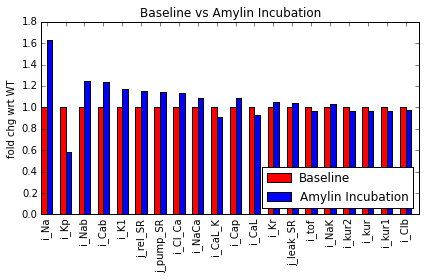

In [50]:
indSS = [5e3,25e3]
xlim = indSS
ao.StateDecompositionAnalysis(cases,wanted1="baseline",wanted2="amylin",\
                              indSS=indSS,xlim=xlim,mode="fluxes",ignoreList=ignoreList)

## UCD

In [128]:
root = "/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
files = ["mouse_decrSERCAuptake0p50_freq1p0_60.pickle"]
reducedFiles = [ x.replace(".pickle","_red.pickle") for x in files]

if 0:
    for i,file in enumerate(files):
        fileName = root+file
        print fileName
        downSamplePickles.downsample(fileName,10)

print reducedFiles

['mouse_decrSERCAuptake0p50_freq1p0_60_red.pickle']


In [129]:
cases['ucd'] = Case.Case(tag="UCD",label="UCD")
cases['ucd'].name = root+reducedFiles[0]

Selecting  baseline
Selecting  ucd
#  UCD
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_decrSERCAuptake0p50_freq1p0_60_red.pickle
Reading /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_decrSERCAuptake0p50_freq1p0_60_red.pickle
#  Baseline
Loading  /home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle
Skipping read, since already populated
/home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_decrSERCAuptake0p50_freq1p0_60_red.pickle
/home/AD/cesc235/wholecell_new3/asdf/wholecell/mouse_freq1p0_60_red.pickle
Skipping  dNa_jct1_buf
Skipping  dNa_SL_buf
Skipping  dCa_SL_tot_bound
Skipping  dCa_Myosin
Skipping  dMg_Myosin
Skipping  dCa_SLB_SL
Skipping  dCa_TroponinC
Skipping  dCa_SRB
Skipping  i_Ca_SL_tot
Skipping  i_Ca_jct1_tot
Skipping  j_rel_SR
Skipping  j_pump_SR
Skipping  temp_jct1
Skipping  dCa_SLHigh_SL
Skipping  i_Cap_SL
Skipping  kiSRCa
Skipping  kCaSR
Skipping  i_CaL_Ca_jct1
Skipping  koSRCa
i_CaL pct 0.10 0 -1.1e-01/1.0e+00 1 -1.2e-01/1.1

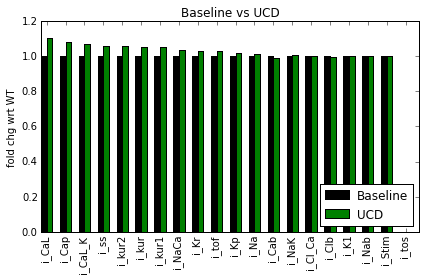

In [130]:
indSS = [5e3,25e3]
xlim = indSS
StateDecompositionAnalysisUCD(cases,wanted1="baseline",wanted2="ucd",\
                              indSS=indSS,xlim=xlim,mode="fluxes",ignoreList=ignoreList)

# lcc

In [ ]:
import downSamplePickles
root = "/home/AD/cesc235/wholecell_new3/asdf/wholecell/"
files = ["mouse_freq1p0_60.pickle","mouse_leak1p25x_freq1p0_60.pickle",\
         "mouse_decrSERCAuptake0p50_leak1p25x_freq1p0_60.pickle", "mouse_lcc1p25x_freq1p0_60.pickle"]
reducedFiles = [ x.replace(".pickle","_red.pickle") for x in files]

if 0:
    for i,file in enumerate(files):
        fileName = root+file
        print fileName
        downSamplePickles.downsample(fileName,10)

print reducedFiles


In [ ]:
cases['baseline'] = Case.Case(tag="Baseline",label="Baseline")
cases['baseline'].name = root+reducedFiles[0]
cases['amylin'] = Case.Case(tag="Amylin",label="Amylin")
cases['amylin'].name = root+reducedFiles[1]
cases['hip'] = Case.Case(tag="HIP",label="HIP")
cases['hip'].name = root+reducedFiles[2]
cases['lcc'] = Case.Case(tag="LCC",label="LCC")
cases['lcc'].name = root+reducedFiles[3]

In [ ]:
ao.LoadPickles(cases,noOverwrite=True)

In [ ]:
indSS = [5e3,25e3]
xlim = indSS
ao.StateDecompositionAnalysis(cases,wanted1="baseline",wanted2="lcc",\
                              indSS=indSS,xlim=xlim,mode="fluxes",ranked=15,ignoreList=ignoreList)

In [ ]:
indSS = [5e3,25e3]
xlim = indSS
ao.StateDecompositionAnalysis(cases,wanted1="amylin",wanted2="lcc",\
                              indSS=indSS,xlim=xlim,mode="fluxes",ranked=15,ignoreList=ignoreList)

In [ ]:
indSS = [5e3,25e3]
xlim = indSS
ao.StateDecompositionAnalysis(cases,wanted1="hip",wanted2="lcc",\
                              indSS=indSS,xlim=xlim,mode="fluxes",ranked=15,ignoreList=ignoreList)

In [ ]:
indSS = [5e3,25e3]
xlim = indSS
ao.StateDecompositionAnalysis(cases,wanted1="amylin",wanted2="lcc",\
                              indSS=indSS,xlim=xlim,ranked=15)

## WT: States not currents

In [ ]:
ignoreList = cases['baseline'].data['j_idx']
ignoreList = [s for s in ignoreList if "i_" in s]
print ignoreList

In [ ]:
indSS = [5e3,25e3]
xlim = indSS
ao.StateDecompositionAnalysis(cases,wanted1="hip",wanted2="amylin",\
                              indSS=indSS,xlim=xlim,mode="states",ranked=15,ignoreList=ignoreList)

In [ ]:
indSS = [5e3,25e3]
xlim = indSS
ao.StateDecompositionAnalysis(cases,wanted1="baseline",wanted2="ucd",\
                              indSS=indSS,xlim=xlim,mode="states",ranked=15,ignoreList=ignoreList)

In [ ]:
indSS = [5e3,25e3]
xlim = indSS
ao.StateDecompositionAnalysis(cases,wanted1="baseline",wanted2="hip",\
                              indSS=indSS,xlim=xlim,mode="states",ranked=15,ignoreList=ignoreList)

In [ ]:
indSS = [5e3,25e3]
xlim = indSS
ao.StateDecompositionAnalysis(cases,wanted1="baseline",wanted2="amylin",\
                              indSS=indSS,xlim=xlim,mode="states",ranked=15,ignoreList=ignoreList)

# LCC States (not currents)

In [ ]:
indSS = [5e3,25e3]
xlim = indSS
ao.StateDecompositionAnalysis(cases,wanted1="amylin",wanted2="lcc",\
                              indSS=indSS,xlim=xlim,mode="states",ranked=15,ignoreList=ignoreList)